In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("admission_data.csv") #Taken from kaggle
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.isnull().sum().sum()

0

In [4]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
data.shape

(500, 8)

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# EDA

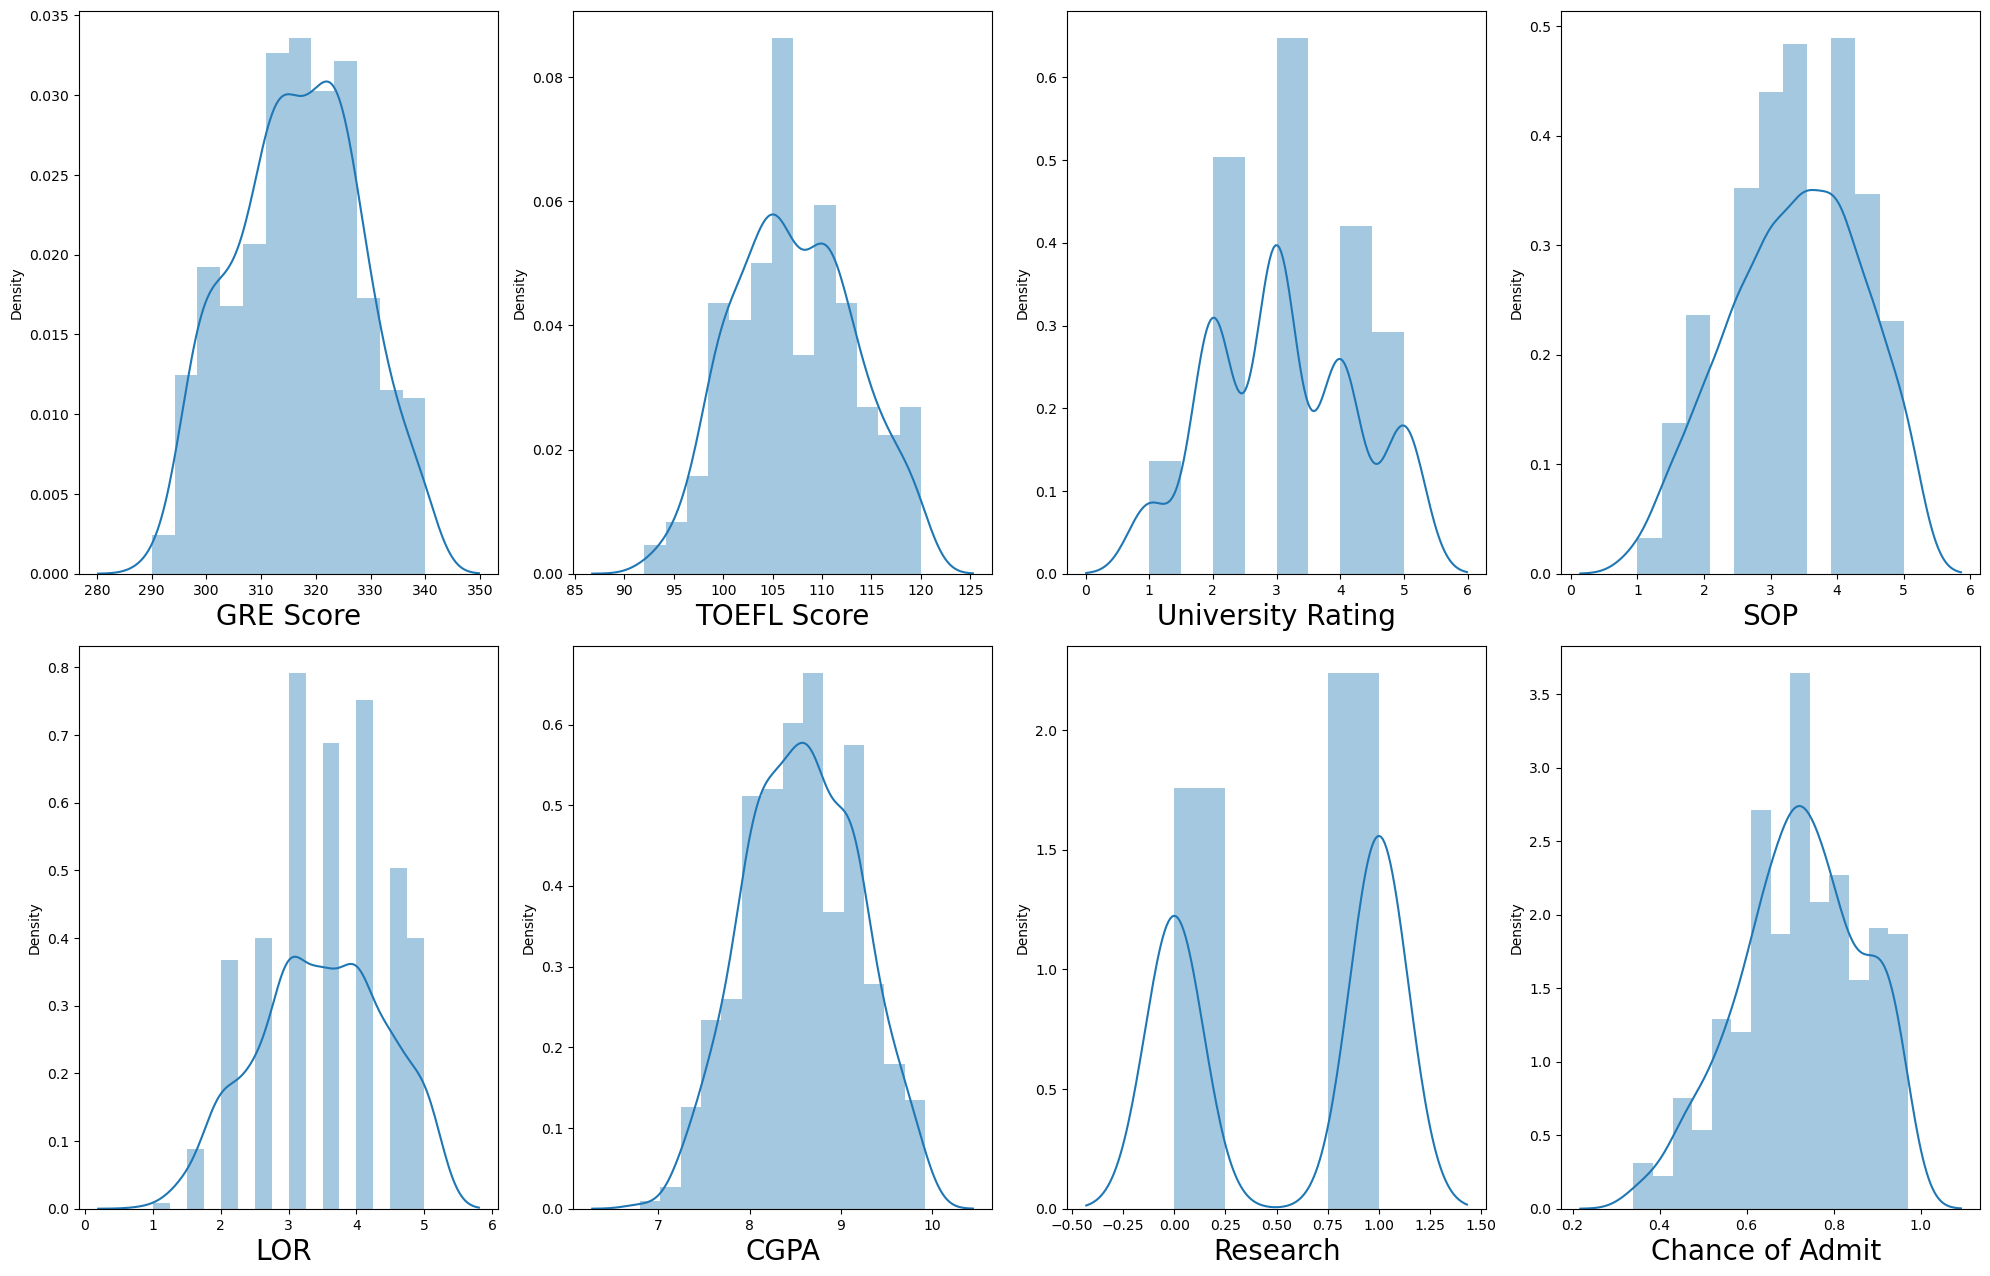

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=8 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

It seems data is normally distributed

In [9]:
Y = data['Chance of Admit ']  #Only dependent variable
X = data.drop(columns = ['Chance of Admit '])

In [10]:
X.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

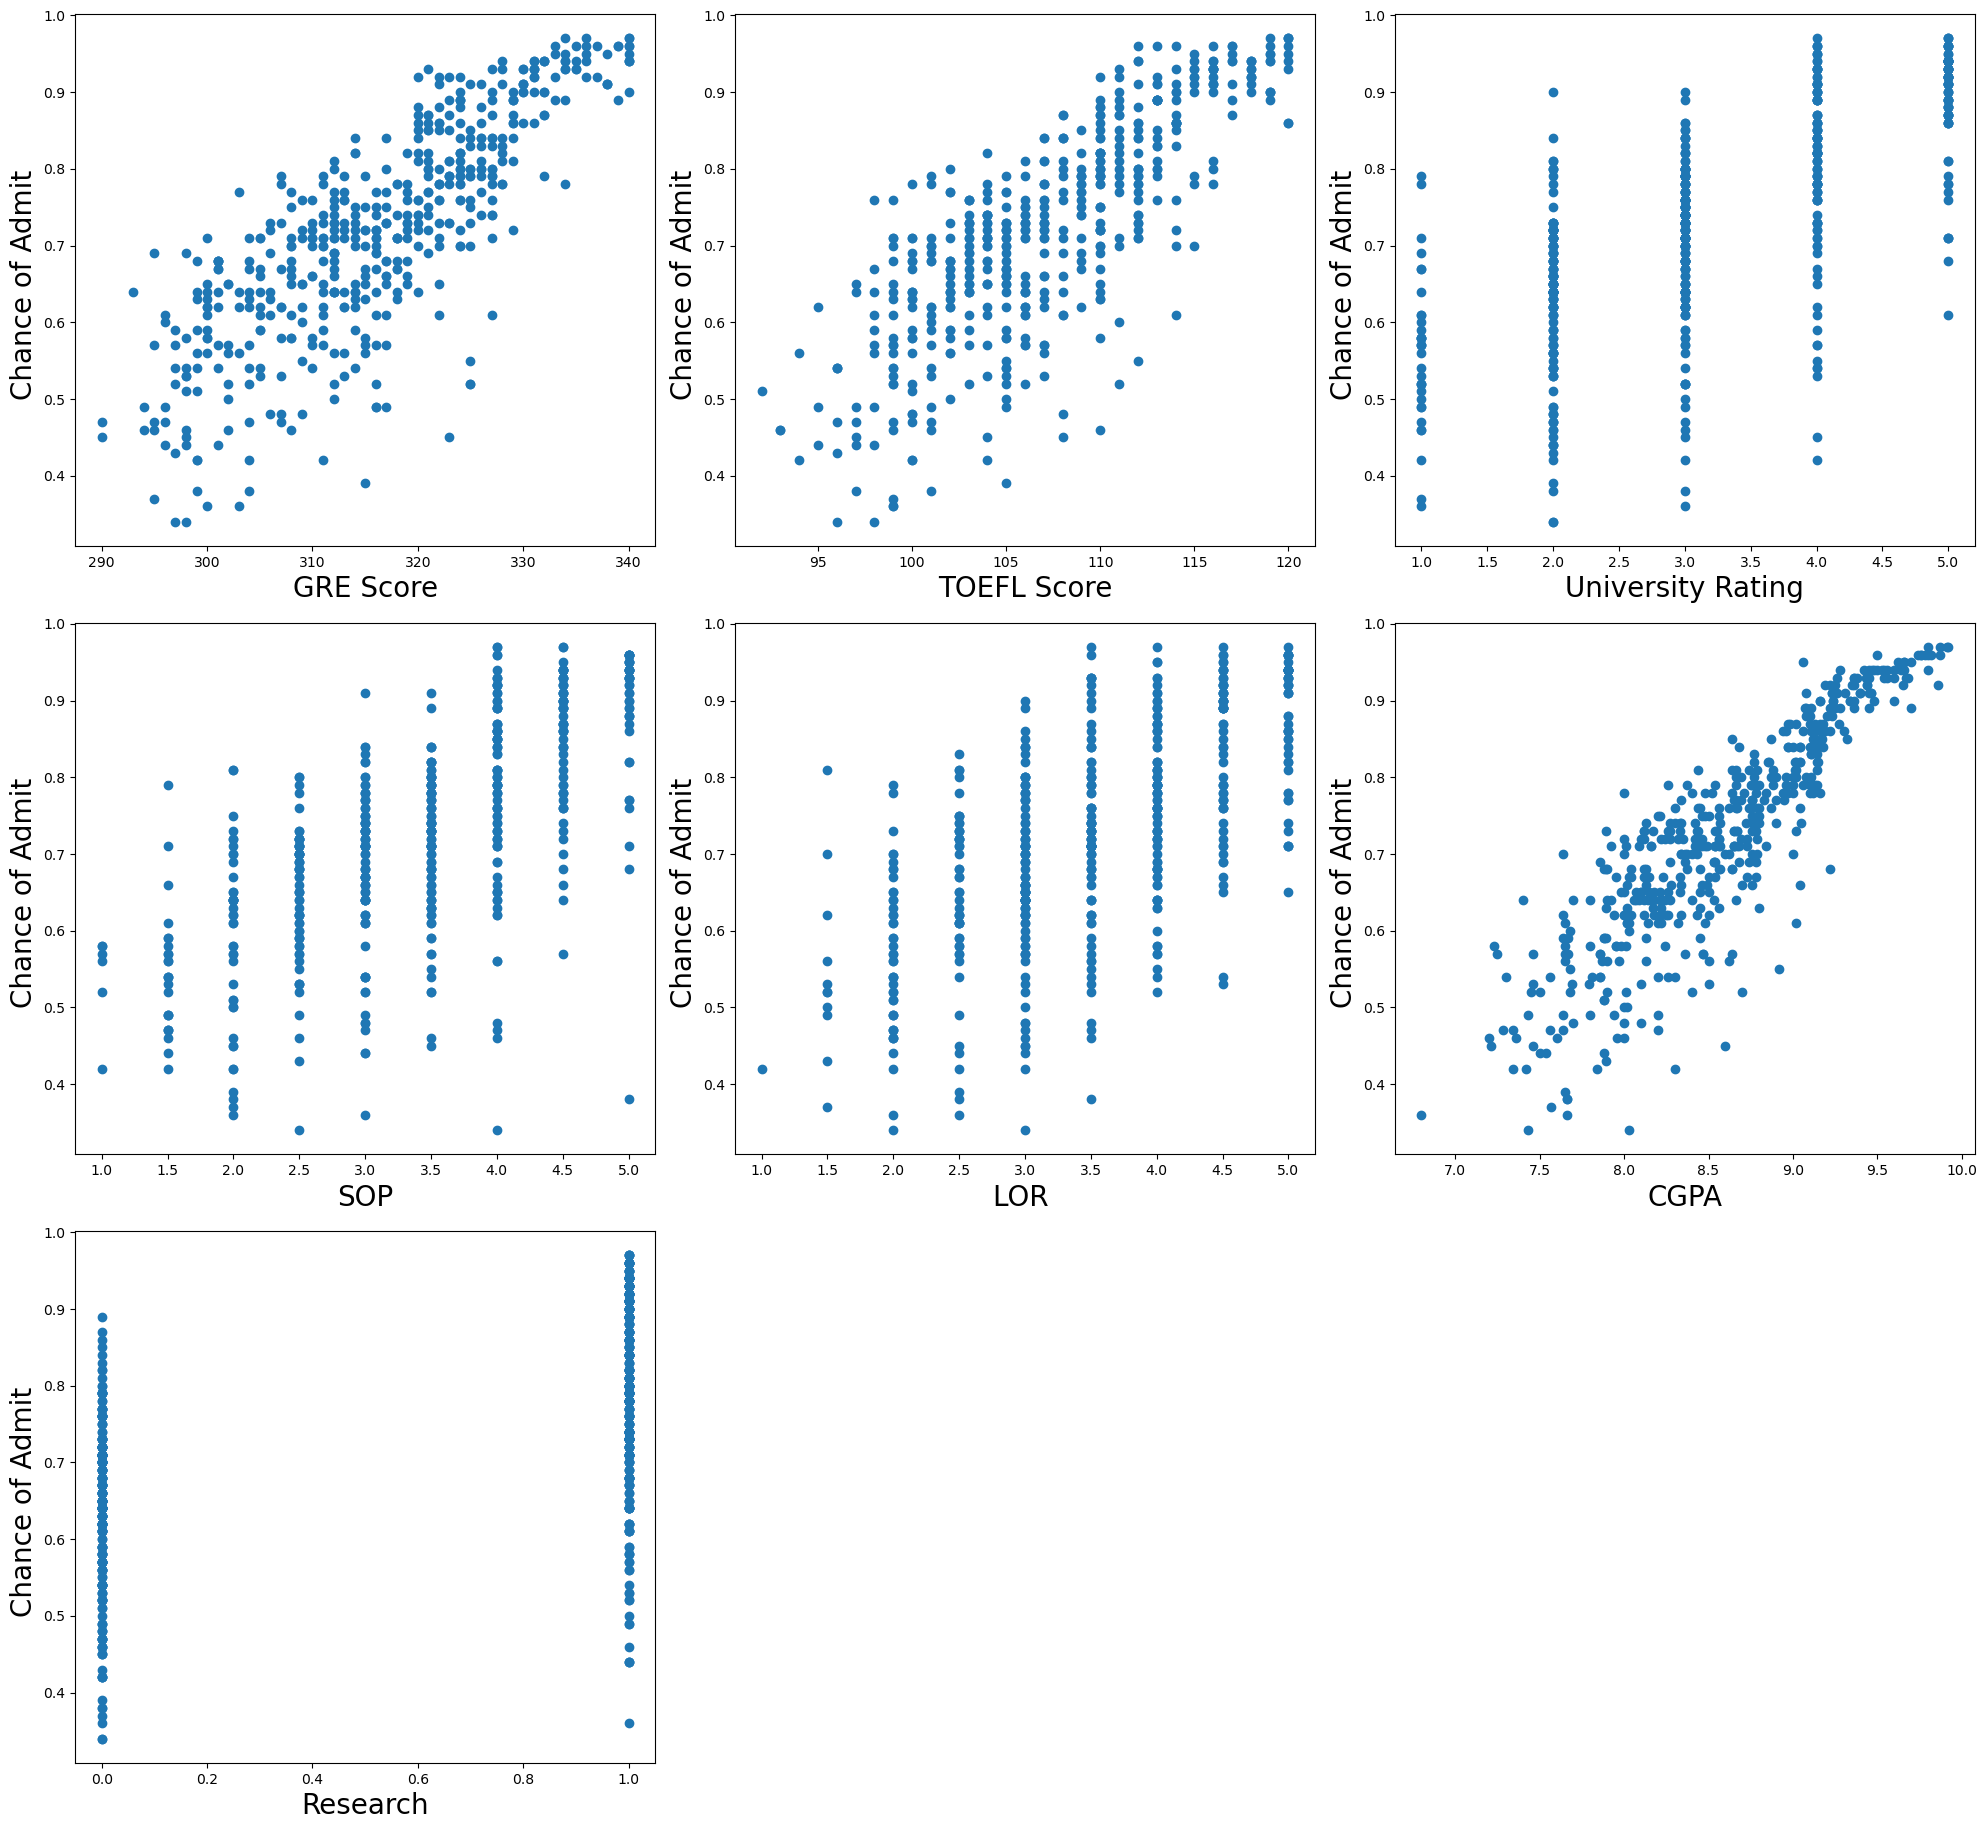

In [11]:
#Lets see the relation between Dependent and Independent Variable
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit ',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [12]:
#There is some linear relation between target and input variables.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


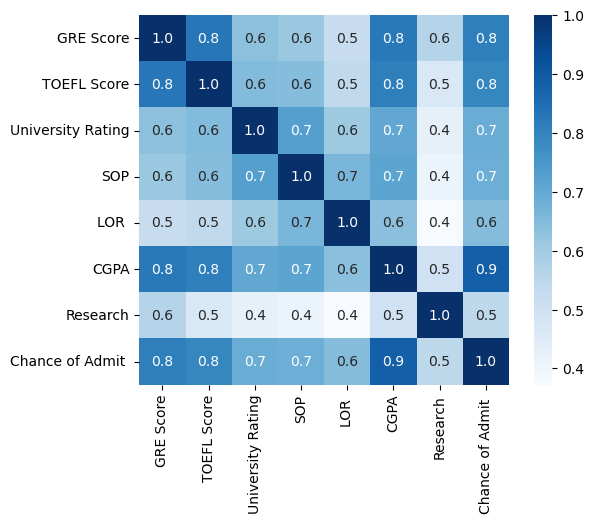

In [13]:
#Correlation check
correlation = data.corr()
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f",annot = True, cmap = "Blues")
correlation


In [14]:
#Splitting our data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=45)

In [15]:
x_train.shape , x_test.shape

((400, 7), (100, 7))

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rf = RandomForestRegressor(n_estimators=100,random_state= 6).fit(x_train,y_train)

In [18]:
rf.feature_importances_

array([0.07289639, 0.0356005 , 0.01350507, 0.02633809, 0.02496422,
       0.81848199, 0.00821374])

In [19]:
rf.score(x_test,y_test)

0.8016613224002782

In [20]:
#Hyperparameter Tuning using Grid Search CV

In [25]:
parameter = {
    "n_estimators" : [90,100,115,130],   
    'max_depth' : range(2,20,1),         ##  Number of features to consider at every split
    'min_samples_leaf' : range(1,10,1),  ##  Minimum number of samples required at each leaf node
    'min_samples_split': range(2,10,1),  ##  Minimum number of samples required to split a node
    'max_features' : ['auto','log2']     ##  Maximum number of levels in tree
}       


In [26]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,param_grid=parameter,cv=5,n_jobs =-1,verbose = 3)

In [27]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=6), n_jobs=-1,
             param_grid={'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [38]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=11, max_features='log2', min_samples_split=9,
                      random_state=6)

In [32]:
rf_gs = RandomForestRegressor(max_depth=11, max_features='log2', min_samples_split=9,random_state=66)
rf_gs.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, max_features='log2', min_samples_split=9,
                      random_state=66)

In [35]:
rf_gs.score(x_test,y_test)

0.832637444167185

As it can be seen that, adding best hyperparameter value increases the accuracy of model (from 80 to 83%)

In [42]:
y_predict = rf_gs.predict(x_test)
y_predict[:20]

array([0.63814226, 0.70594398, 0.72535645, 0.53071162, 0.86309701,
       0.6417497 , 0.80534369, 0.75655815, 0.63127324, 0.73123166,
       0.76153143, 0.95274576, 0.66823636, 0.9453804 , 0.5971842 ,
       0.50600707, 0.88739414, 0.7315839 , 0.65886813, 0.79882078])

Text(0, 0.5, 'y_prediciton')

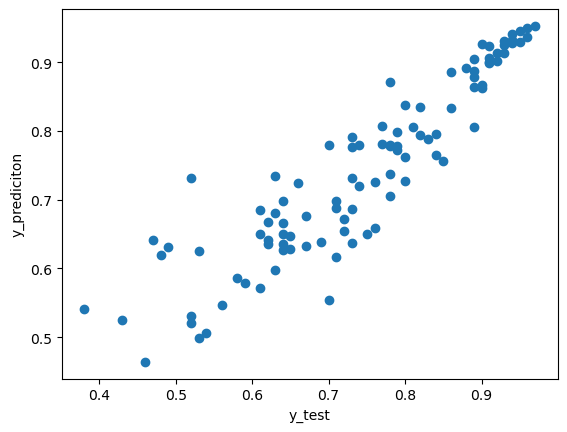

In [66]:
plt.scatter(y_test,y_predict)
plt.xlabel("y_test")
plt.ylabel("y_prediciton")

In [67]:
#Saving model
import pickle

In [69]:
filename ="rf_model"
pickle.dump(rf_gs,open(filename,"wb"))

In [77]:
load_model = pickle.load(open(filename, "rb"))
load_model.predict(x_test)

array([0.63814226, 0.70594398, 0.72535645, 0.53071162, 0.86309701,
       0.6417497 , 0.80534369, 0.75655815, 0.63127324, 0.73123166,
       0.76153143, 0.95274576, 0.66823636, 0.9453804 , 0.5971842 ,
       0.50600707, 0.88739414, 0.7315839 , 0.65886813, 0.79882078,
       0.65039394, 0.93715594, 0.78853664, 0.9300136 , 0.78006098,
       0.49905092, 0.57876525, 0.62802688, 0.87824862, 0.62532975,
       0.79188017, 0.79386116, 0.66586448, 0.90218003, 0.68575169,
       0.77671962, 0.57087406, 0.77300306, 0.68001557, 0.89964057,
       0.61970873, 0.94922172, 0.63529247, 0.64965647, 0.88623696,
       0.62661899, 0.55435528, 0.78050027, 0.68806974, 0.73438228,
       0.72500567, 0.91269281, 0.92494015, 0.83333367, 0.69766875,
       0.78001204, 0.68703582, 0.73761232, 0.69847879, 0.91407229,
       0.64149549, 0.64712799, 0.92648882, 0.65487976, 0.67193092,
       0.7196447 , 0.92359959, 0.6368753 , 0.65004187, 0.80678365,
       0.77926473, 0.92768042, 0.90554965, 0.52015587, 0.77761